In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Calculo de $\pi$

### Serie de Liebniz

$\frac{\pi}{4}=1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+...$

$$\sum_{n=0}^N (-1)^n\frac{1}{2n+1}=a(N)=\frac{\pi(N)}{4}$$

In [2]:
def Sn(n):
  return (-1)**n * (1)/(2*n+1)

def Serie(N):

  suma=0

  for n in (range(0,N+1)):
    suma+=Sn(n)
  
  return suma

4*Serie(1000)

3.1425916543395442

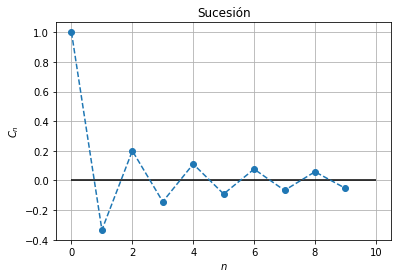

In [3]:
n=np.arange(0,10,1)
Yn=Sn(n)

plt.plot(n,Yn,'o--')
plt.title('Sucesión')
plt.xlabel('$n$')
plt.ylabel('$C_n$')
plt.grid()
plt.hlines(0,0,10)
#plt.xlim(80,100)
#plt.ylim(-1e-2,1e-2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.         2.66666667 3.46666667 2.8952381  3.33968254 2.97604618
 3.28373848 3.01707182 3.25236593 3.04183962]


Text(0, 0.5, '$\\pi(N)$')

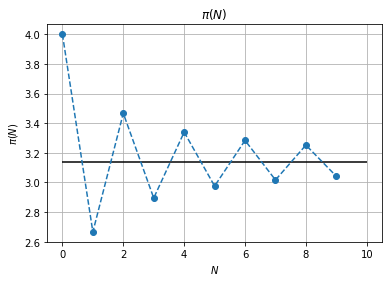

In [4]:
N=np.arange(0,10,1)
piN1=np.zeros(len(N))
print(piN1)
for i in range(0,len(N)):
  piN1[i]=4*Serie(N[i])

print(piN1)

plt.plot(N,piN1,'o--')
plt.hlines(np.pi,0,10)

plt.grid()
plt.title('$\pi(N)$')
plt.xlabel('$N$')
plt.ylabel('$\pi(N)$')

### Productoria

$\frac{2}{\pi}=\frac{\sqrt{2}}{2}\times\frac{\sqrt{2+\sqrt{2}}}{2}\times\frac{\sqrt{2+\sqrt{2+\sqrt{2}}}}{2}...$

$$\Pi_n^N D_n = b(N)=\frac{2}{\pi(N)}$$

$$D_0=\frac{\sqrt{2}}{2} \,,\, D_n=\sqrt{\frac{1}{2}(1+D_{n-1})}$$

In [5]:
def Dn(n):
  if n==0:
    return np.sqrt(2)/2
  else:
    return np.sqrt(1/2*(1+Dn(n-1)))

Dn(100)

def prod(N):
  pr=1
  for n in (range(0,N+1)):
    pr*=Dn(n)

  return pr

2/prod(100)

3.141592653589794

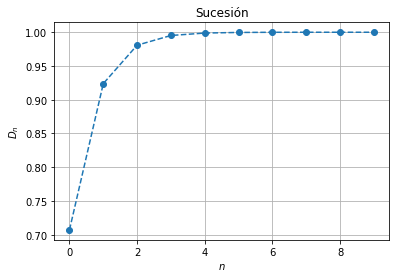

In [6]:
n=np.arange(0,10,1)
Cn=np.zeros(len(n))

for i in range(len(n)):
  Cn[i]=Dn(n[i])

plt.plot(n,Cn,'o--')
plt.title('Sucesión')
plt.xlabel('$n$')
plt.ylabel('$D_n$')
plt.grid()

Text(0, 0.5, '$\\pi(N)$')

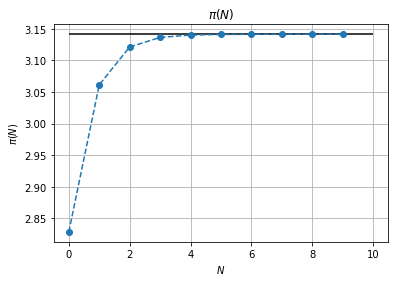

In [7]:
N=np.arange(0,10,1)
piN2=np.zeros(len(N))

for i in range(len(N)):
  piN2[i]=2/prod(N[i])

plt.plot(N,piN2,'o--')
plt.hlines(np.pi,0,10)

plt.grid()
plt.title('$\pi(N)$')
plt.xlabel('$N$')
plt.ylabel('$\pi(N)$')

# Teoría de errores

Sea $x$ el valor obtenido y $x^*$ el valor real

#### Error Absoluto:

$$|x-x^*|$$

#### Error Relativo:
$$\frac{|x-x^*|}{|x^*|}$$

#### Error Relativo Porcentual:
$$\frac{|x-x^*|}{|x^*|}100 \%$$

# Ejercicio

Calcular $N$ para que el error absoluto y el error relativo sean menor o igual a $10^{-6}$

Error absoluto 0.001
[False False False False False  True  True  True  True  True]
Sumatoria: []
Productoria: [5 6 7 8 9]
----------------------
Error relativo: 1e-06
Sumatoria: []
Productoria: [9]


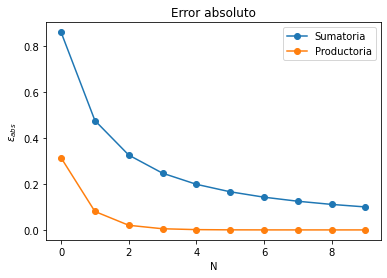

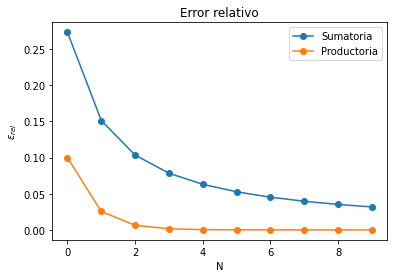

In [8]:
#Error absoluto
e1=abs(piN1-np.pi)
e2=abs(piN2-np.pi)

e1r=e1/np.pi
e2r=e2/np.pi

plt.figure()
plt.title('Error absoluto')
plt.plot(N,e1,'o-',label='Sumatoria')
plt.plot(N,e2,'o-',label='Productoria')
plt.legend()
plt.xlabel('N')
plt.ylabel('$\epsilon_{abs}$')

plt.figure()
plt.title('Error relativo')
plt.plot(N,e1r,'o-',label='Sumatoria')
plt.plot(N,e2r,'o-',label='Productoria')
plt.legend()
plt.xlabel('N')
plt.ylabel('$\epsilon_{rel}$')

print('Error absoluto',1e-3)
print(e2<1e-3)
print('Sumatoria:',N[e1<1e-3])
print('Productoria:',N[e2<1e-3])

print('----------------------')

print('Error relativo:',1e-6)
print('Sumatoria:',N[e1r<1e-6])
print('Productoria:',N[e2r<1e-6])

# Ejercicio

Calcular y graficar la serie de Fibonacci

$$f_0=0\,, f_1=1 \,, f_n=f_{n-1}+f_{n-2}$$

In [9]:
#plt.title('Fibonacci $N=%s$'%N)

# Bernoulli

$$B_m=-\frac{1}{m+1}\sum_{k=0}^{m-1}\begin{pmatrix}
m+1 \\
k
\end{pmatrix} B_k$$

$$B_0=1$$

Donde $\begin{pmatrix}
n \\
k
\end{pmatrix} = \frac{n!}{k!(n-k)!}$ con $0\leq k\leq n$

In [10]:
def factorial(n):
  if n==0:
    return 1
  else:
    return n*factorial(n-1)

def comb(n,k):
  return factorial(n)/(factorial(n-k)*factorial(k))

In [11]:
def Bm(m):
    B=np.zeros(m+1)
    B[0]=1
    
    for M in range(1, m +1):
        suma=0
        for k in range(0,M-1 +1):
            suma+=comb(M+1,k)*B[k]
        B[M]=-(1/(M+1))*suma
        
    return B

print(Bm(9))

[ 1.00000000e+00 -5.00000000e-01  1.66666667e-01 -0.00000000e+00
 -3.33333333e-02 -7.40148683e-17  2.38095238e-02  8.32667268e-17
 -3.33333333e-02  3.55271368e-16]
